# Predicting Airline passenger satisfaction

You are given a dataset that holds information from a passenger survey.
Your job is to build an ML model that can predict passenger satisfaction given information about their travel.
\[**Total marks: 20**\]

#### Dataset ####
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Marking scheme ###

Work on this notebook by adding your code and comments below. Please make sure you explain your steps and report your findings within the notebook. The marking scheme bellow gives you an indication of what you are expected to do.

Overall presentation and quality of notebook \[**5 marks**\]

Data preprocessing \[**7 marks**\]
- Initial observations
    - Check for null values
    - Check for duplicates
    - Check for unusual values or data types
    - Write your observations
- Exploratory Data Analysis 
    - Explore distributions of feature values
    - Investigate correlations between features
        - Hint: if you want to select only numerical features from your dataset use the pandas function `<datset>.select_dtypes(include='number')`
    - Write your observations
- Cleaning
    - Remove unnecessary features and/or fix wrong values if necessary

Data encoding \[**4 marks**\]
- Apply appropriate data encoding
  - check for binary values (one or the other) or values that reflect an order - these are ordinal values
  - check for features where the values don't reflect any order - these are nominal values
- Report your steps and decisions as you apply them

Train a classifier \[**4 marks**\]
- Consider how you will split your train/test data
- Select an appropriate classifier and train it over the dataset
- Report the performance with appropriate metrics (e.g. f1 score, confusion matrix)







In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airline.csv')

In [40]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [42]:
df.head(20)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


After reviewing the dataset:

#### Findings & Todo
1. All categorical values will be checked for unique values to handle typos.
2. All categorical values will be assigned with numerical values.
3. Arrival Delay in Minutes has missing values and is of float type. I want to convert them to integer.

#### Suggestions
1. Average rating per customer based on all rating values could be a valuable column to have in this set.

# Handling Null Values

In [43]:
df['Arrival Delay in Minutes'].isnull().sum() # Number of null values

np.int64(393)

In [44]:
df['Arrival Delay in Minutes'].value_counts() # Checking the frequency of each value in the column

Arrival Delay in Minutes
0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
491.0        1
344.0        1
940.0        1
369.0        1
705.0        1
Name: count, Length: 472, dtype: int64

In [45]:
# Let's replace null values in Arrival Delay in Minutes column with column's mode

modeOfArrivalDelay = df['Arrival Delay in Minutes'].mode()[0]
print(modeOfArrivalDelay) # Mode of Arrival Delay in Minutes column is 0.0

df.fillna({'Arrival Delay in Minutes': modeOfArrivalDelay}, inplace=True)

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(np.int64)

df.info() # Let's check if null values are replaced

0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Inflight wifi service              129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Ease of Online booking             129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Food and drink                     129880 non-nu

# Checking for duplicate rows

In [46]:
df.duplicated().sum() 

np.int64(0)

# Checking for unique values of all categorical columns

In [47]:
categorical_columns = df.select_dtypes(include='object').columns
unique_values = df[categorical_columns].nunique()
print(unique_values)
df[categorical_columns].head()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


__Nominals__: Gender, Customer Type, Type of Travel.

__Ordinals__: Class, Satisfaction

Class column can be ordinal due to ticket price and benefits of that class. Extra space, free drinks etc.
I will assign numerical values in order from the cheapest to the most expensive.
There is an unclear point in this assumption, what is Eco Plus? Is it Eco with some benefits or extra cheap with less benefits.
Typically Eco Plus indicates Eco with some benefits, so it is ranked higher.

Satisfaction also has some underlying order. Satisfied is a positive feedback so it should be 1, and neutral or dissatisfied should be 0.

Eco = 0, Eco Plus = 1, Business = 2.

Neutral or dissatisfied = 0, Satisfied = 1.

# Encoding Categorical Data

In [48]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # Map Gender
df['Customer Type'] = df['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1}) # Map Customer Type
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1}) # Map Type of Travel

df.head() # Nominal columns are mapped successfully

# I did not use OHE for the nominal columns because they are binary nominal columns.

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [49]:
df['Class'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2}) # Map Class
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1}) # Map satisfaction

df.head() # Ordinal columns are mapped successfully

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,1,460,3,4,3,...,5,4,3,4,4,5,5,25,18,0
1,5047,0,0,25,1,2,235,3,2,3,...,1,1,5,3,1,4,1,1,6,0
2,110028,1,1,26,1,2,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026,1,1,25,1,2,562,2,5,5,...,2,2,5,3,1,4,2,11,9,0
4,119299,0,1,61,1,2,214,3,3,3,...,3,3,4,4,3,3,3,0,0,1


In [50]:
df.info() # One last check for the consistency of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 129880 non-null  int64
 1   Gender                             129880 non-null  int64
 2   Customer Type                      129880 non-null  int64
 3   Age                                129880 non-null  int64
 4   Type of Travel                     129880 non-null  int64
 5   Class                              129880 non-null  int64
 6   Flight Distance                    129880 non-null  int64
 7   Inflight wifi service              129880 non-null  int64
 8   Departure/Arrival time convenient  129880 non-null  int64
 9   Ease of Online booking             129880 non-null  int64
 10  Gate location                      129880 non-null  int64
 11  Food and drink                     129880 non-null  int64
 12  On

The dataset has no missing values and all columns are int64. We have a consistent dataset in our hands.

# Exploring the clean dataset

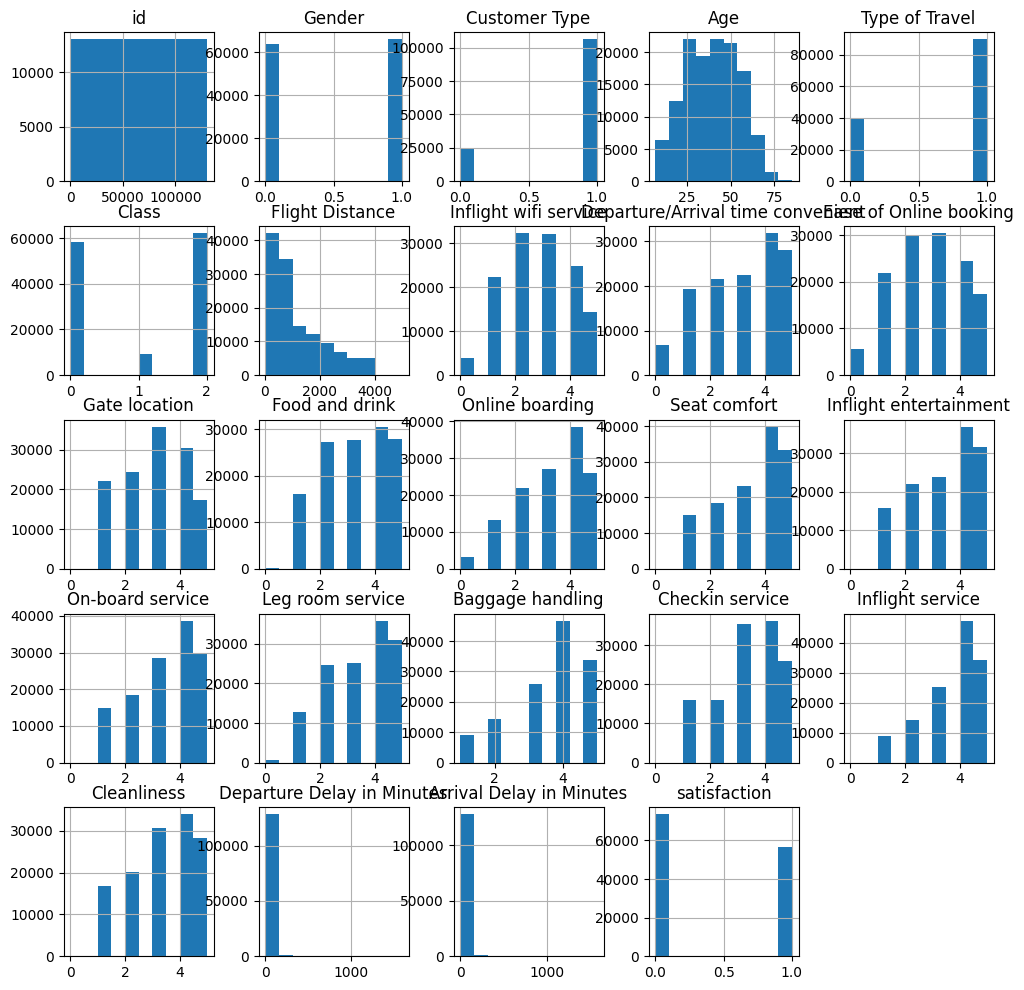

In [51]:
df.hist(figsize=(12, 12))
plt.show()

In [52]:
disloyalCustomersCount = df[df['Customer Type'] == 0]['Customer Type'].count()
loyalCustomersCount = df[df['Customer Type'] == 1]['Customer Type'].count()

businessTravelCount = df[df['Type of Travel'] == 1]['Type of Travel'].count()
personalTravelCount = df[df['Type of Travel'] == 0]['Type of Travel'].count()

businessClassCount = df[df['Class'] == 2]['Class'].count()
ecoPlusEcoCount = df[df['Class'].isin([0, 1])]['Class'].count()

noDepartureDelayPercentage = df[df['Departure Delay in Minutes'] == 0]['Departure Delay in Minutes'].count() / df['Departure Delay in Minutes'].count() * 100
noArrivalDelayPercentage = df[df['Arrival Delay in Minutes'] == 0]['Arrival Delay in Minutes'].count() / df['Arrival Delay in Minutes'].count() * 100

print("Loyal to disloyal customer ratio:", loyalCustomersCount / disloyalCustomersCount) # Loyal : disloyal customer ratio
print("Business to personal travel ratio:", businessTravelCount / personalTravelCount) # Business : personal travel ratio
print("Business class to Eco Plus + Eco ticket ratio:", businessClassCount / ecoPlusEcoCount) # Business class : Eco Plus + Eco ticket ratio
print("Percentage of flights that depart on time:", noDepartureDelayPercentage) # Percentage of flights that depart on time
print("Percentage of flights that arrive on time:", noArrivalDelayPercentage) # Percentage of flights that arrive on time

serviceAverage = df.iloc[:, 7:21].mean().mean()
print("Average service rating:", serviceAverage)

Loyal to disloyal customer ratio: 4.461732548359967
Business to personal travel ratio: 2.23189090999577
Business class to Eco Plus + Eco ticket ratio: 0.9178972238629651
Percentage of flights that depart on time: 56.47982753310748
Percentage of flights that arrive on time: 56.31813982137358
Average service rating: 3.2412672136917595


# Correlations

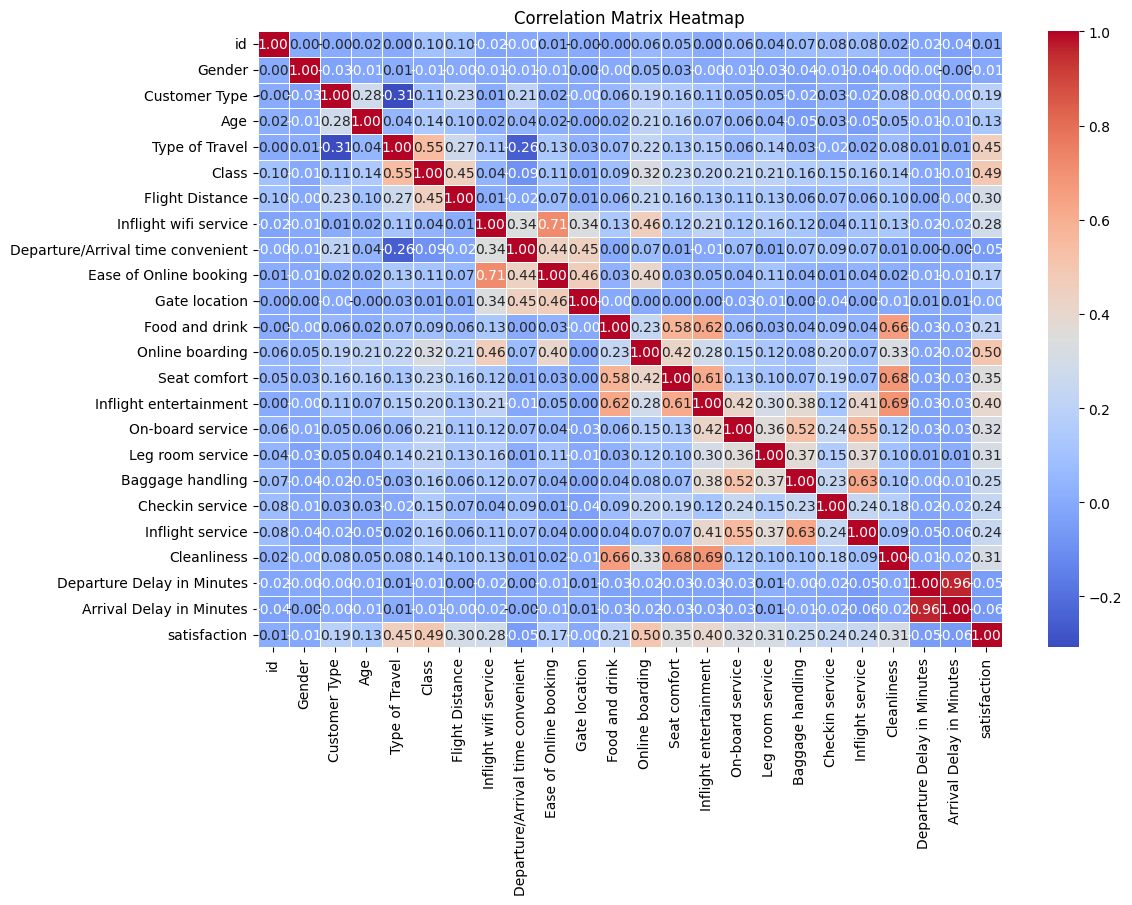

In [53]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Observations
I do not see any redundant features in this dataset. I would like to keep all features for training.


### Notes

I did not use scikit MinMaxScaler because I did not want to make columns 7 to 20 float64. They will remain as int64.

# Splitting the dataset and training the model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Split
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(max_depth = 15, min_samples_split = 5, min_samples_leaf = 1, n_estimators = 100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy of the model:", model.score(X_test, y_test))


Accuracy of the model: 0.9613489374807515


# Confusion Matrix Plot and F1 Score 

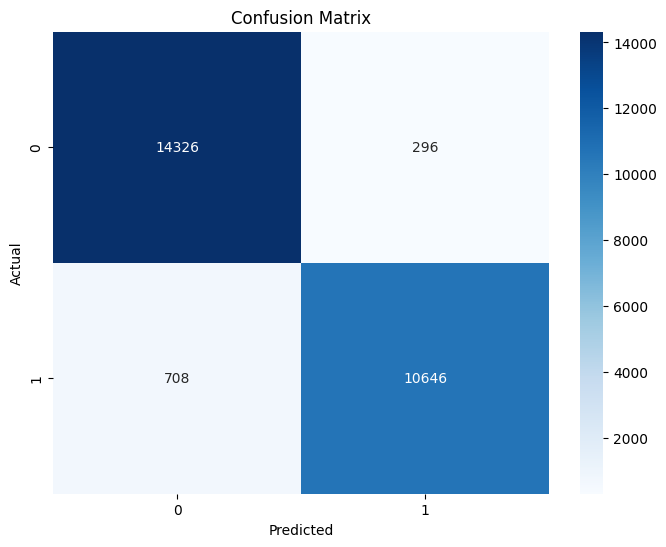

F1 score: 0.9549695012558307


In [55]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


# Recall Score

In [56]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.9376431213669192
